In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [20]:
class Const:
    def __init__(self):
        self.n_animals_max = 1000
        self.n_animals_start = 20 #original number of animals
        self.n_smallsteps = 400
        self.vmin = 0.01
        self.vmax = 0.05
        self.v_decay = 0.7
        
        self.hp_baby = 100
        self.hp_food = 5
        self.hp_birthcost = 10
        self.hp_reproduction = 30
        self.hp_leak = 0.5
        
        self.food_rate = 1
        self.eating_distance = 0.05
        self.n_food_max = 1000
        self.n_food_start = 100

In [29]:
def model(c, show_dotses = False, ntraces  = 1):
    historical_estimation = np.zeros((c.n_smallsteps, ntraces))
                                                                                       
    for e in range(ntraces): 
    #arrays of numbers--speed and direction of each moose
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low = c.hp_baby, high = c.hp_reproduction, size = c.n_animals_start)
        x = np.random.uniform(size = c.n_animals_max)
        y = np.random.uniform(size = c.n_animals_max)
        vx = np.random.uniform(size = c.n_animals_max, low = c.vmin, high = c.vmax) * (
            2* np.random.randint(size = c.n_animals_max, low = 0, high = 2) -1)
        vy = np.random.uniform(size = c.n_animals_max, low = c.vmin, high = c.vmax) * (
            2* np.random.randint(size = c.n_animals_max, low = 0, high = 2) -1)
        
        #and arseny said let there be cabbage
        foodx = np.ones(c.n_food_max) * -1
        foodx[: c.n_food_start] = np.random.uniform(size = c.n_food_start)
        foody = np.random.uniform(size = c.n_food_max)
        
        
        n_animals = np.zeros(c.n_smallsteps)
        
        
        if show_dotses: #plotting preparation
                fig = plt.figure(figsize=(3,3))
                ax = plt.subplot(111)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.show();
                fig.canvas.draw();
                #time.sleep(0.01)


        for t in range(c.n_smallsteps):
            x += vx
            y += vy
            
            vx = vx * c.v_decay + np.random.randn(c.n_animals_max) * c.vmin
            vy = vy * c.v_decay + np.random.randn(c.n_animals_max) * c.vmin
            
            vx = np.where(np.logical_or(x > 1, x < 0), -vx, vx)
            vy = np.where(np.logical_or(y > 1, y < 0), -vy, vy)
            x = np.maximum(0,np.minimum(x,1))
            y = np.maximum(0,np.minimum(y,1))
            
            for i in range(c.n_animals_max):
                if hp[i] <= 0:
                    continue
                    
                    #version w loops
                for u in range(c.n_food_max):
                    if foodx[u] < 0:
                        continue
                        
                    d = np.sqrt((x[i] - foodx[u])**2 + (y[i] - foody[u])**2)
                    
                    if d < c.eating_distance:
                        hp[i] += c.hp_food
                        foodx[u] = -1
                    #d = np.sqrt((x[i] - foodx) **2 + (y[i] - foody) **2)
                   # d < (d < c.eating_distance)
                  #  eaten_food = d < c.eating_distance
                   # foodx[eaten_food] = -1
                   # hp[i] += c.hp_food * sum(eaten_food)
         
            # let cabbage grow
            
            potential_cabbage = np.argwhere(foodx<0)
            if potential_cabbage.size != 0:
                foodx[potential_cabbage[0]] = np.random.uniform()
                foody[potential_cabbage[0]] = np.random.uniform()
            
            potential_babies = np.argwhere(c.hp_reproduction > 0)
            if potential_babies.size != 0:
                babyplace = np.argwhere(hp <= 0)
                hp[potential_babies[0]] -= c.hp_birthcost
                x[babyplace[0]] = x[potential_babies[0]]
                y[babyplace[0]] = c.hp_baby
            
            hp -= c.hp_leak #death
            
            n_animals[t] = np.sum(hp > 0) #make this work plz
            
            if show_dotses:
                ax.clear()
                plt.plot(x[hp > 0],y[hp > 0], "k.", markersize = 2);
                plt.plot(foodx, foody, "g.", markersize = 2)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw()
                #time loop is over
            
            historical_estimation[:,e] = n_animals
        return np.mean(historical_estimation, axis = 1)  ;   

<IPython.core.display.Javascript object>


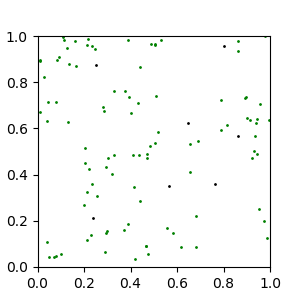

<IPython.core.display.Javascript object>


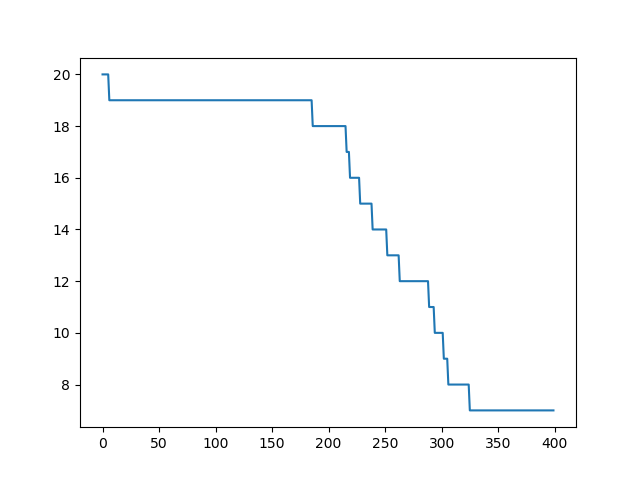

In [30]:
c = Const()
curve = model(c, show_dotses = True);
plt.figure()
plt.plot(curve)

In [19]:
c.hp_baby

10